<a href="https://colab.research.google.com/github/tjoetmuty/QUIZ_PCD/blob/main/Quiz_Tjoet_Muty_Ahmad_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama : Tjoet Muty Ahmad
#NIM : F 551 22 013

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
image = cv2.imread('/content/quiz.jpeg')

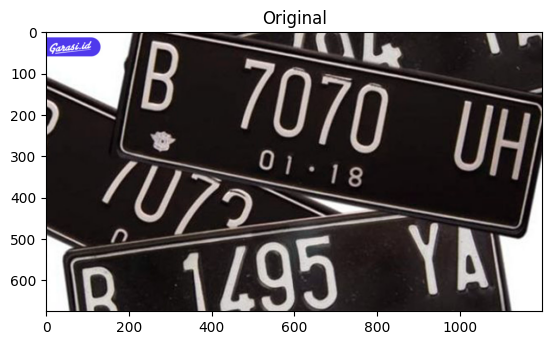

In [49]:
#1. baca gambar menggunakan opencv dan PIL
plt.title("Original")
plt.imshow(image)

In [50]:
#2. lakukan edge detection menggunakan sobel dan canny
#sobel
sobel_edge_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_edge_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_edge_x, sobel_edge_y)

#canny
canny_edge = cv2.Canny(image, 100, 200)

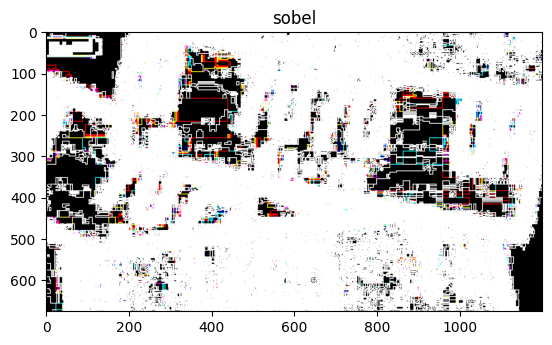

In [51]:
plt.title("sobel")
plt.imshow(sobel_edge)

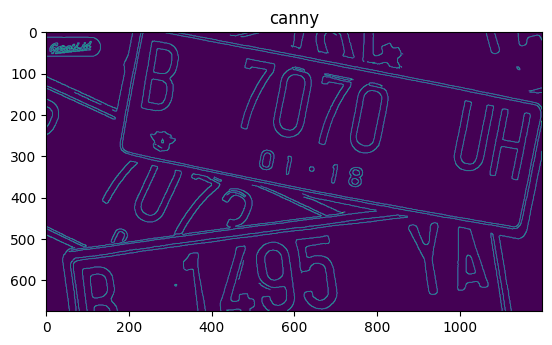

In [52]:
plt.title("canny")
plt.imshow(canny_edge)

In [55]:
#3. random cropping dan half-size center cropping
if image is None:
    print("Error: gambar tidak ada.")
else:
    # Mendapatkan tinggi dan lebar gambar
    tinggi, lebar, _ = image.shape
    print("Tinggi gambar:", tinggi)
    print("Lebar gambar:", lebar)

Tinggi gambar: 675
Lebar gambar: 1200


In [59]:
#random crop
def random_crop(image, crop_height, crop_width):
    h, w = image.shape[:2]
    y = random.randint(0, h - crop_height)
    x = random.randint(0, w - crop_width)
    return image[y:y+crop_height, x:x+crop_width]

In [73]:
random_cropped_image = random_crop(image, 300, 300)

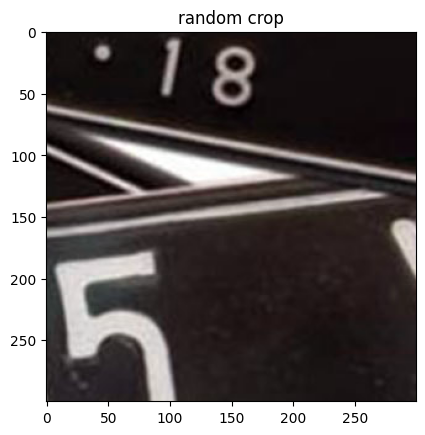

In [74]:
plt.title('random crop')
plt.imshow(random_cropped_image)

In [69]:
#center crop
def center_crop(image):
    h, w = image.shape[:2]
    center_h, center_w = h // 2, w // 2
    crop_height, crop_width = center_h // 2, center_w // 2
    return image[center_h-crop_height:center_h+crop_height, center_w-crop_width:center_w+crop_width]

In [70]:
center_cropped_image = center_crop(image)

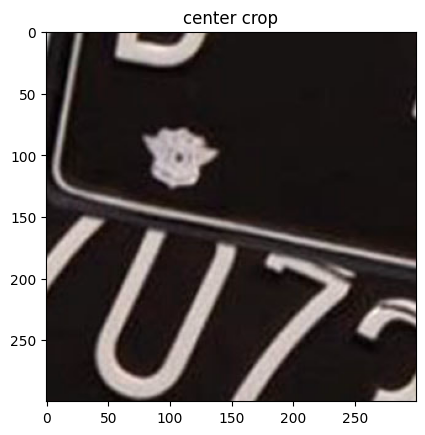

In [72]:
plt.title('center crop')
plt.imshow(random_cropped_image)

In [75]:
#4. transformasi pada gambar : putih jadi hitam, hitam jadi putih
import matplotlib.pyplot as plt

In [77]:
ret, thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)

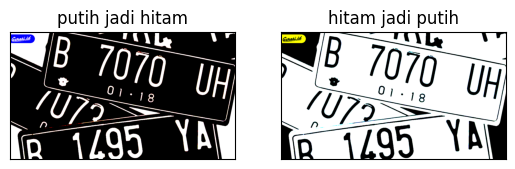

In [83]:
titles =['putih jadi hitam', 'hitam jadi putih',]
images = [thresh1, thresh2]

for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

In [104]:
#5. noise pada gambar original: salt and paper noise dan gaussian

# Salt and Pepper Noise
def add_salt_and_pepper_noise(image, salt_vs_pepper=0.5, amount=0.01):
    row, col, _ = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1], :] = 255

    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1], :] = 0
    return image

In [108]:
noisy_image_salt_pepper = add_salt_and_pepper_noise(image.copy())

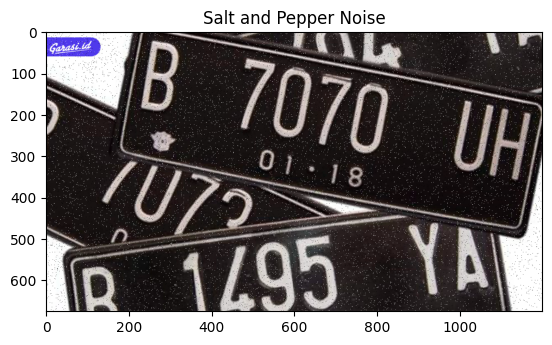

In [109]:
plt.title('Salt and Pepper Noise')
plt.imshow(noisy_image_salt_pepper)

In [110]:
# Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.clip(image.astype(np.float64) + gauss, 0, 255).astype(np.uint8)
    return noisy_image

In [111]:
noisy_image_gaussian = add_gaussian_noise(image.copy())

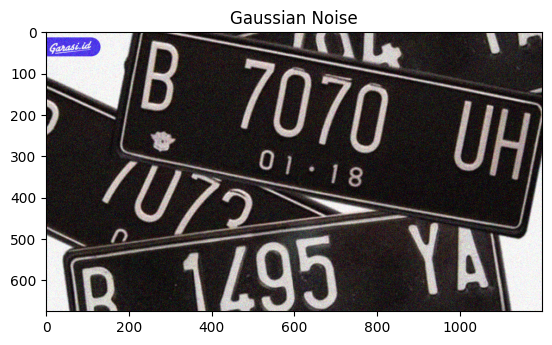

In [112]:
plt.title('Gaussian Noise')
plt.imshow(noisy_image_gaussian)

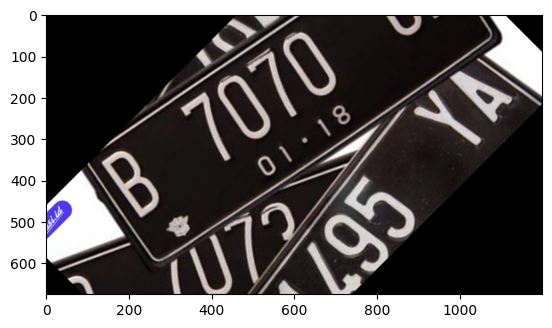

In [114]:
#6. transformasi geometri : rotasi, flip, vartikal dan horizontal


#rotasi
titik_rotasi = (lebar // 2, tinggi // 2)
matrix_rotasi = cv2.getRotationMatrix2D(titik_rotasi, 45, 1.0)
rotasi_gambar = cv2.warpAffine(image, matrix_rotasi, (lebar, tinggi))

plt.imshow(rotasi_gambar)

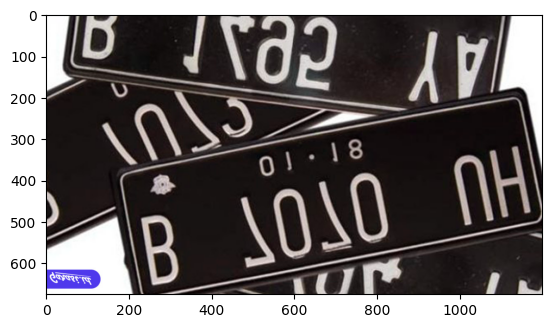

In [120]:
#flip
flipping_horizontal = cv2.flip(image, 1)
flipping_vertical = cv2.flip(image, 0)

plt.imshow(flipping_vertical)

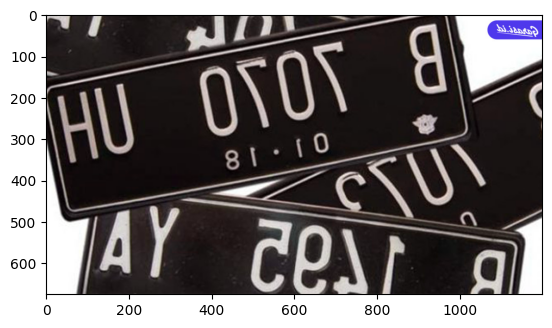

In [119]:
plt.imshow(flipping_horizontal)